In [1]:
import os
import sys
import pickle
import numpy as np

sys.path.append('/n/home04/aboesky/berger/Weird_Galaxies')

from neural_net import plot_training_loss

In [2]:
grid_results = []
for fname in os.listdir('/n/home04/aboesky/berger/Weird_Galaxies/grid_search/results'):
    with open(f'/n/home04/aboesky/berger/Weird_Galaxies/grid_search/results/{fname}', 'rb') as f:
        grid_results.append(pickle.load(f))

In [3]:
# Get the best loss
best_loss = {'test': np.inf, 'train': np.inf}
best_params = None
for params, loss in grid_results:
    if np.min(loss['test']) < np.min(best_loss['test']):
        best_params = params
        best_loss = loss

print(f'The best parameter combination in our grid search are:\n\nbatch_size, nodes_per_layer, num_linear_output_layers, learning_rate\n{best_params[::-1]}')

The best parameter combination in our grid search are:

batch_size, nodes_per_layer, num_linear_output_layers, learning_rate
[4096, [18, 15, 12, 9, 6, 4], 3, 0.01]


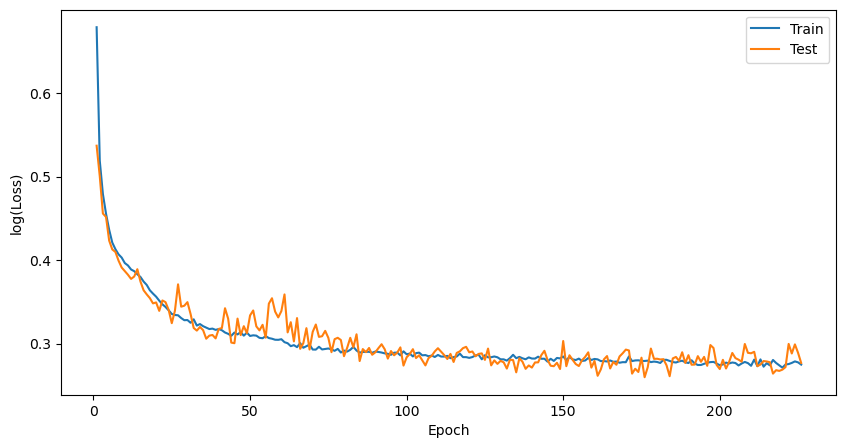

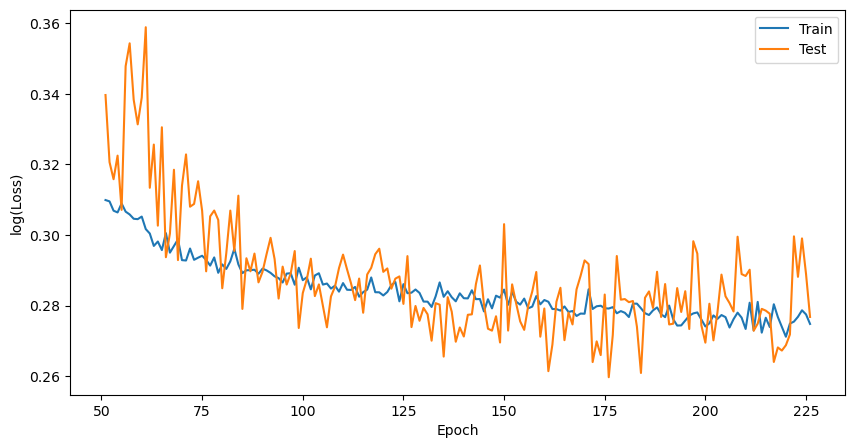

In [4]:
plot_training_loss(best_loss['train'], best_loss['test'], filename='best_loss_v_epoch.png')